# Week 11 Exercises

_McKinney 7.2, 11.1_

The general activity that we are doing in this week's exercise is to explore and try to understand a particular data set.  In this case, it is 

1. Read in the data file and filter down to only looking at MO hospitals
2. Aggregate by Hospital: sum the Denominator, use min Start Date, use max End Date  (watch for rows with no Denominator value!)
3. Calculate the average per day across that entire span
4. Histogram
5. Rank and find the hospital with the most

## STEP 1 - Read and Filter

<img src="images/step1.png" alt="Read and Filter Output" style="width: 500px; float: right; margin-left: 20px; border: 1px solid">

In the first step, read in the data file from the data directory `/data/complications_all.csv`.  It is a CSV file and Pandas should read it in just fine.  Explore the file so that you understand the columns and values.  At the end of this step, create a variable called `mo_hospitals` that contains a data frame from the `complications_all.csv` file, filtered down to only contain those hospitals from the state of Missouri (MO).

A screenshot is included for reference.



In [54]:
import pandas as pd

#read or load data from CSV file
data = pd.read_csv('/data/complications_all.csv')
#returns a state containing counts of unique values in sorted order.
data['State'].value_counts()

TX    7649
CA    6603
FL    3538
IL    3431
NY    3233
PA    3215
OH    3140
KS    2564
GA    2564
MI    2519
MN    2463
WI    2374
OK    2273
IN    2260
IA    2216
LA    2184
MO    2133
NC    2076
TN    1962
MS    1836
WA    1798
KY    1760
NE    1697
AL    1690
VA    1671
CO    1570
AZ    1500
AR    1456
NJ    1260
MA    1196
MT    1184
OR    1152
SC    1133
SD    1101
PR     994
MD     962
WV     955
UT     899
ND     842
ID     804
NM     804
NV     715
ME     633
CT     595
WY     525
NH     494
HI     456
AK     456
VT     272
RI     196
DC     139
DE     139
VI      38
GU      38
AS      19
MP      19
Name: State, dtype: int64

In [55]:
#get the number of rows and columns
data.shape

(91395, 18)

In [56]:
#filter only the row from dateframe where state is missouri(MO)
filter = data['State'] == 'MO'
mo_hospitals = data[filter]

#Viewing the first 5 lines
mo_hospitals.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date
45534,260001,MERCY HOSPITAL JOPLIN,100 MERCY WAY,JOPLIN,MO,64804,JASPER,(417) 781-2727,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,26,2.5,1.4,4.2,NaN,04/01/2015,03/31/2018
45535,260001,MERCY HOSPITAL JOPLIN,100 MERCY WAY,JOPLIN,MO,64804,JASPER,(417) 781-2727,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,175,13.9,11.0,16.9,NaN,07/01/2015,06/30/2018
45536,260001,MERCY HOSPITAL JOPLIN,100 MERCY WAY,JOPLIN,MO,64804,JASPER,(417) 781-2727,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,91,2.5,1.2,5.1,NaN,07/01/2015,06/30/2018
45537,260001,MERCY HOSPITAL JOPLIN,100 MERCY WAY,JOPLIN,MO,64804,JASPER,(417) 781-2727,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,326,8.5,6.5,10.9,NaN,07/01/2015,06/30/2018
45538,260001,MERCY HOSPITAL JOPLIN,100 MERCY WAY,JOPLIN,MO,64804,JASPER,(417) 781-2727,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,461,13.1,10.7,15.9,NaN,07/01/2015,06/30/2018


In [57]:
mo_hospitals['State'].unique()

array(['MO'], dtype=object)

In [58]:
mo_hospitals.shape

(2133, 18)

In [59]:
# These assertions will help make sure that you're on the right track.
assert(mo_hospitals['State'].unique() == ['MO'])
assert(mo_hospitals.shape == (2133,18))

## STEP 2 - Transform and Aggregate

<img src="images/step2.png" alt="Transforma and Aggregate Output" style="width: 500px; float: right; margin-left: 20px; border: 1px solid">

In the next step, we need to aggregate the results by hospital.  There are some key fields that we want to summarize, though:
* We want to know the earliest date that each hospital was participating in any program
* We want to know the latest date that each hospital stopped participating in any program
* We want to know the total number of patients in the denominators of these programs

Some things to note:
* You will need to convert the `Start Date` and `End Date` to actual datetime fields
* You will need to clean up and convert the `Denominator` field to just be numeric - the rule that you should use it to simply remove any records where the `Denominator` is `'Not Available'`

The final result of this step should be a new data frame called `mo_summary` that contains one row for each hospital and contains the min start date, max end date, and total denominator.  Use the names `start_date`, `end_date`, and `number` for those columns in `mo_summary`.

A screenshot is included for reference.

In [61]:
#convert string to datetime format
start_date = pd.to_datetime(mo_hospitals['Start Date'].astype(str), format = '%m/%d/%Y')
end_date = pd.to_datetime(mo_hospitals['End Date'].astype(str), format = '%m/%d/%Y')

#Using 'start' and 'end' as the column name 
mo_hospitals['start'] = start_date
mo_hospitals['end'] = end_date

#filter the column 'Denominator' which is not 'Not Available',and
#Using 'count' as the column name and covert it to integer
mo_hospitals = mo_hospitals[mo_hospitals['Denominator'] != 'Not Available']
mo_hospitals['count'] = mo_hospitals['Denominator'].astype(int)

#Group by Facility Name and calculate the minimum start date,
#the maximum end date and total sum
mo_summary = mo_hospitals.groupby('Facility Name').aggregate({
    'start': ['min'], 
    'end': ['max'], 
    'count': ['sum']})
#reassign the column name
mo_summary.columns = ['start_date','end_date','number']

#Viewing the first 5 lines
mo_summary.head()

,start_date,end_date,number
Facility Name,,,
BARNES JEWISH HOSPITAL,2015-04-01,2018-06-30,131313
BARNES-JEWISH ST PETERS HOSPITAL,2015-04-01,2018-06-30,15668
BARNES-JEWISH WEST COUNTY HOSPITAL,2015-04-01,2018-06-30,9622
BATES COUNTY MEMORIAL HOSPITAL,2015-07-01,2018-06-30,3117
BELTON REGIONAL MEDICAL CENTER,2015-04-01,2018-06-30,9270


In [62]:
mo_summary['number'].sum()

1766908

In [63]:
mo_summary['start_date'].min()

Timestamp('2015-04-01 00:00:00')

In [64]:
mo_summary['end_date'].max()

Timestamp('2018-06-30 00:00:00')

In [65]:
mo_summary.shape

(108, 3)

In [66]:
mo_summary.loc['BARNES JEWISH HOSPITAL'].number

131313

In [67]:
mo_summary.loc['BOONE HOSPITAL CENTER'].number

63099

In [68]:
assert(mo_summary['number'].sum() == 1766908)
assert(mo_summary['start_date'].min() == pd.Timestamp(2015,4,1))
assert(mo_summary['end_date'].max() == pd.Timestamp(2018,6,30))
assert(mo_summary.shape == (108,3))
assert(mo_summary.loc['BARNES JEWISH HOSPITAL'].number == 131313)
assert(mo_summary.loc['BOONE HOSPITAL CENTER'].number == 63099)

## STEP 3: Average Per Day

<img src="images/step3.png" alt="Average per Day" style="width: 500px; margin-left: 20px; float: right; border: 1px solid">


The next step, now that we have a start date, end date, and total patients for each day is to calculate how many patients on average per day this represents.  You will need to calculate the number of days between the start date and end date, and then the average as total patients divided by number of days.

Your final output should still be the variable `mo_summary`, and it will need to have two additional columns: `days` and `per_day`.

A screenshot is included for reference.


In [69]:
#Calcute the number of days between the start date and end date
#Using 'days' as a column name
mo_summary['days'] = (mo_summary.end_date - mo_summary.start_date).dt.days

#calculate the average number per day
#Using 'per_day' as a column name
mo_summary['per_day'] = mo_summary['number'] / mo_summary['days']

#Viewing the first 5 lines
mo_summary.head()

,start_date,end_date,number,days,per_day
Facility Name,,,,,
BARNES JEWISH HOSPITAL,2015-04-01,2018-06-30,131313,1186,110.719224
BARNES-JEWISH ST PETERS HOSPITAL,2015-04-01,2018-06-30,15668,1186,13.210793
BARNES-JEWISH WEST COUNTY HOSPITAL,2015-04-01,2018-06-30,9622,1186,8.112985
BATES COUNTY MEMORIAL HOSPITAL,2015-07-01,2018-06-30,3117,1095,2.846575
BELTON REGIONAL MEDICAL CENTER,2015-04-01,2018-06-30,9270,1186,7.816189


In [70]:
mo_summary['days'].sum()

123718

In [71]:
mo_summary['per_day'].mean()

13.841279932122697

In [72]:
mo_summary['per_day'].min()

0.023744292237442923

In [73]:
mo_summary['days'].min()

729

In [74]:
mo_summary['days'].max()

1186

In [75]:
assert(mo_summary['days'].sum() == 123718)
assert(mo_summary['per_day'].mean() == 13.841279932122697)
assert(mo_summary['per_day'].min() == 0.023744292237442923)
assert(mo_summary['days'].min() == 729)
assert(mo_summary['days'].max() == 1186)

## STEP 4: Histogram

<img src="images/step4.png" alt="Histogram" style="width: 300px; float: right; margin-left: 20px; border: 1px solid">

For this step, I want you to plot a histogram to give yourself a better understanding of this new metric we've calculated: how many patients per day have a potential complication.  Looking at the shape and distribution of the data might give us some indication of the hospital volume and quality.  (Don't take this too seriously, though.  We're cutting some important corners.)

A screenshot is included for reference.

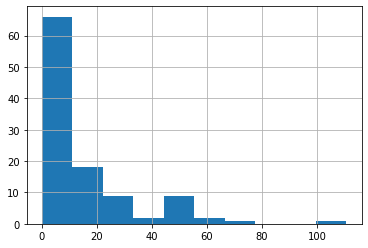

In [76]:
%matplotlib inline
#plot the histogram
mo_summary['per_day'].hist()


## STEP 5: Rank Order

Now that we see what the distribution looks like, you can tell that most of the `per_day` values are below 20.  There are, however, some outliers up around 100!  Who are those?  Let's rank the data set by the `per_day` value in descending order, examine them, and produce a list of the "top 3" based on this criteria.  That is, who are the top three hospitals based on having the highest `per_day` values.

At the end of this step, put those hospital names in a list called `top_hospitals` and that will be used for testing.  They should be in the order they appear `[#1, #2, #3]`.  That is, if the top hospitals were Mercy (99.3), BJC (97.2), and MoBap (90.1), then you would have `top_hospitals = ['Mercy','BJC','MoBap']`

In [77]:
##rank of per_day using 'rank' as a column name
mo_summary['rank'] = mo_summary['per_day'].rank()
#sort values in descending order
mo_summary = mo_summary.sort_values(by=['rank'], ascending=False)

#calculate the top three hospitals based on having the highest per_day values.
top_hospitals = mo_summary[:3].index.values.tolist()

In [78]:
type(top_hospitals)

list

In [79]:
top_hospitals

['BARNES JEWISH HOSPITAL', 'MERCY HOSPITAL SPRINGFIELD', 'COX MEDICAL CENTERS']

In [80]:
assert(type(top_hospitals) == list)
### BEGIN HIDDEN TESTS
assert(top_hospitals == ['BARNES JEWISH HOSPITAL', 'MERCY HOSPITAL SPRINGFIELD', 'COX MEDICAL CENTERS'])
### END HIDDEN TESTS